# 第二章 深度学习基础

从本章开始，我们将探索深度学习的奥秘。作为机器学习的⼀类，深度学习通常基于神经⽹络模型逐级表⽰越来越抽象的概念或模式。我们先从**线性回归**和`softmax`回归这两种单层神经⽹络⼊⼿，简要介绍机器学习中的基本概念。然后，我们由单层神经⽹络延伸到多层神经⽹络，并通过**多层感知机**引⼊深度学习模型。在观察和了解了模型的过拟合现象后，我们将介绍深度学习中应对过拟合的常⽤⽅法：**权重衰减**和**丢弃法**。接着，为了进⼀步理解深度学习模型训练的本质，我们将详细解释**正向传播**和**反向传播**。掌握这两个概念后，我们能更好地认识深度学习中的数值稳定性和初始化的⼀些问题。最后，我们通过⼀个深度学习应⽤案例对本章内容学以致⽤。

在本章的前⼏节，我们先介绍单层神经⽹络：线性回归和`softmax`回归。

## 2.1 线性回归

线性回归输出是⼀个连续值，因此适⽤于回归问题。回归问题在实际中很常⻅，如预测房屋价格、⽓温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是⼀个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴，`softmax`回归则适⽤于分类问题。

由于线性回归和`softmax`回归都是单层神经⽹络，它们涉及的概念和技术同样适⽤于⼤多数的深度学习模型。我们⾸先以线性回归为例，介绍⼤多数深度学习模型的基本要素和表⽰⽅法。

### 2.1.1 线性回归的基本要素

我们以⼀个简单的房屋价格预测作为例⼦来解释线性回归的基本要素。这个应⽤的⽬标是预测⼀栋房⼦的售出价格(元)。我们知道这个价格取决于很多因素，如房屋状况、地段、市场⾏情等。为了简单起⻅，这⾥我们假设价格只取决于房屋状况的两个因素，即⾯积(平⽅⽶)和房龄(年)。接下来我们希望探索价格与这两个因素的具体关系。

**模型**

设房屋的⾯积为$x_1$，房龄为$x_2$，售出价格为$y$。我们需要建⽴基于输⼊$x_1$和$x_2$来计算输出$y$的表达式，也就是模型(`model`)。顾名思义，线性回归假设输出与各个输⼊之间是线性关系，如下公式(2-1-1)所示：

$$
\hat{y}=x_1\omega_1+x_2\omega_2+b \tag{2-1-1}
$$

其中$\omega_1$和$\omega_2$是权重(`weight`)，$b$是偏差(`bias`)，且均为标量。它们是线性回归模型的参数(`parameter`)。模型输出$\hat{y}$是线性回归对真实价格$y$的预测或估计。我们通常允许它们之间有⼀定误差。

**模型训练**

接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练(`model training`)。下⾯我们介绍模型训练所涉及的3个要素。

**训练数据**

我们通常收集⼀系列的真实数据，例如多栋房屋的真实售出价格和它们对应的⾯积和房龄。我们希望在这个数据上⾯寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语⾥，该数据集被称为训练数据集(`training data set`)或训练集(`training set`)，⼀栋房屋被称为⼀个样本(`sample`)，其真实售出价格叫作标签(`label`)，⽤来预测标签的两个因素叫作特征(`feature`)。特征⽤来表征样本的特点。

假设我们采集的样本数为$n$，索引为$i$的样本的特征为$x_1^i$和$x_2^i$，标签为$y^i$。对于索引为$i$的房屋，线性回归模型的房屋价格预测表达式如下公式(2-1-2)。

$$
\hat{y}^i=x_1^i\omega_1+x_2^i\omega_2+b\tag{2-1-2}
$$

**损失函数**

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它通过公式(2-1-3)评估索引为$i$的样本误差。

$$
\ell^i(\omega_1,\omega_2,b)=\frac{1}{2}(\hat{y}^i-y^i)^2\tag{2-1-3}
$$

其中常数$\frac{1}{2}$使对平方项求导后的常熟系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为零(但在回归中，最好不要出现误差全部为零的情况，因为很大程度上说明此时严重过拟合，那么泛化能力则可能被严重限制)。

给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为损失函数(`loss function`)。这里使用的平方误差函数也被称为平方损失(`square loss`)。

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，如公式(2-1-4)所示。

$$
\ell(\omega_1,\omega_2,b)=\frac{1}{n}\sum_{i=1}^n\ell^i(\omega_1,\omega_2,b)=\frac{1}{n}\sum_{i=1}^n\frac{1}{2}(x_1^i\omega_1+x_2^i\omega_2+b-y^i)^2\tag{2-1-4}
$$

在模型训练中，我们希望找出一组模型参数，记为$\omega_1^*,\omega_2^*,b^*$，来使训练样本平均损失最小：

$$
\omega_1^*,\omega_2^*,b*=\underset{\omega_1,\omega_2,b}{argmin}\ell(\omega_1,\omega_2,b)\tag{2-1-5}
$$

**优化算法**

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫做解析解(`analytical solution`)。本节使用的线性回归和平方误差便属于该范围。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做数值解(`numerical solution`)。

在求数值解的优化算法中，小批量随机梯度下降(`mini-batch stochastic gradient descent`)在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量(`mini-batch`)$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数(梯度)，最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型过程中，模型的每个参数将作如下迭代：
$$
\omega_1 \leftarrow \omega_1-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\frac{\partial \ell^i(\omega_1,\omega_2,b)}{\partial \omega_1}=\omega_1-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}x_1^i(x_1^i\omega_1+x_2^i\omega_2+b-y^i),\\
\omega_2 \leftarrow \omega_2-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\frac{\partial \ell^i(\omega_1,\omega_2,b)}{\partial \omega_2}=\omega_2-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}x_2^i(x_1^i\omega_1+x_2^i\omega_2+b-y^i),\\
b \leftarrow b-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\frac{\partial \ell^i(\omega_1,\omega_2,b)}{\partial b}=b-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}x_2^i(x_1^i\omega_1+x_2^i\omega_2+b-y^i).
$$

在上式中，$|\mathcal{B}|$代表每个小批量中的样本个数(批量大小，`batch size`)，$\eta$称作学习率(`learning rate`)，一般取值在0到1之间。

需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出来的，因此叫作超参数(`hyperparameter`)。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。

**模型预测**

模型训练完成后，我们将模型参数$\omega_1,\omega_2,b$在优化算法停止时的值分别记作$\hat{\omega}_1,\hat{\omega}_2,\hat{b}$。需要注意的是，算法停止时得到的值并不一定就是最小化损失函数的最优解$\omega_1^*,\omega_2^*,b^*$，而是对最优解的一个近似。然后，我们就可以使用训练得到的线性回归模型$x_1\hat{\omega}_1+x_2\hat{\omega}_2+\hat{b}$来估算训练数据集以外任意的结果。这里的估算也叫做模型预测、模型推断或模型测试。

### 2.1.2 线性回归的表示方法

上面我们阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

**神经网络图**

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，我们下面会对每个网络展示其网络图，当然，手动绘图过于费时，我们这里展示跳过，但不影响后面内容的学习和理解。

**矢量计算表达式**

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，我们应该先了解两个向量相加的方法。

在其他语言中，一般被叫做数组，而不是向量，而向量应该是数学当中特有的叫法，同时矩阵、张量等也是如此。在`python,matlab`等科学计算的语言中，是可以直接进行矩阵论中的相关计算，和数学的计算一致。同时，这种直接的矩阵运算，相比普通的数组计算节省了大量时间。

下面，我们在`python`中使用两种方法进行计算，同时查看两种方法计算所需耗时。

In [1]:
from time import time
import torch

a = torch.ones(size=(1000, 1))
b = torch.ones(size=(1000, 1))

下面首先使用普通的计算，就是对这两个张量逐一做标量加法。

In [12]:
start = time()
c = torch.zeros(size=(1000, 1))
for i in range(1000):
    c[i,0] = a[i, 0] + b[i, 0]
time() - start

0.015667200088500977

下面我们使用矩阵加法，也就是数学意义上的，直接将这两个张量做矢量加法。

In [13]:
start = time()
d = a + b
time() - start

0.0

相对而言，后者两个张量的计算耗时几乎可以忽略不计。因此，在计算时，为了提示计算效率，我们应该尽可能地采用矢量计算地方式对张量进行计算。

我们以房屋预测计算原理为例，当我们对训练集中的三个样本进行预测(索引分别使用1、2、3表示)，将可以表示成下面形式：

$$
\hat{y}^1=x_1^1\omega_1+x_2^1\omega_2+b,\\
\hat{y}^2=x_1^2\omega_1+x_2^2\omega_2+b,\\
\hat{y}^3=x_1^3\omega_1+x_2^3\omega_2+b.
$$

上面上标表示对应样本，$x_i$表示房价预测的数据特征，在当前的示例中，我们假设有两个特征；$\omega_i,b$则是通过大量数据训练得到的对应特征权重和偏执。

>所有的预测，或者神经网络，个人认为都可以看作是通过特定公式计算而来，而公式中各参数都是通过大量的自动计算，得到最符合总体趋势的结果作为参数，而后根据已有的规律，应用到新的场景中。

现在，我们将上面的三个灯饰转化成矢量计算，即转化成矩阵运算的格式。设：

$$
\pmb{\hat{y}}=\begin{bmatrix}\hat{y}^1\\ \hat{y}^2\\ \hat{y}^3 \end{bmatrix},
\pmb{X}=\begin{bmatrix}x_1^1&x_2^1\\ x_1^2&x_2^2\\ x_1^3&x_2^3 \end{bmatrix},
\pmb{\omega}=\begin{bmatrix}\omega_1\\ \omega_2 \end{bmatrix}.
$$

对房屋进行预测的矢量计算表达式(矩阵运算表达式)为：$\pmb{\hat{y}}=\pmb{X\omega}+b$。其中加法使用了广播机制，如下所示：

In [10]:
a = torch.ones(size=(1, 3))
b = 10
a + b

tensor([[11., 11., 11.]])

在这里，`torch`中的`size`是一个`tuple`类型，也就是至少是一个二维矩阵。例如`[1,1,1]`，我们可以认为它是一行三列，但在`torch`按照一行三列进行生成，那就是有两个维度的出现(如上面示例)，而不是以数组的形式(`[1,1,1]`)出现。

倘若我们需要将其展平，变成数组形式。那么可以使用`reshape`或者`flatten`。如下所示：

In [12]:
a.flatten()

tensor([1., 1., 1.])

In [13]:
a.reshape(-1)

tensor([1., 1., 1.])

其实，在参考的书籍之中，还重写了对应损失函数以及小批量梯度下降公式等，但我觉得，在初学阶段，并不需要对此过于深究，毕竟，数学公式是枯燥得，初学者大概率不能一次看懂。但是，并不是看不懂就不能进行学习，当然，公式是对算法最底层原理的朴素描述，能看懂并理解当然再好不过了。但我更愿意将这些底层的，朴素的东西放在最后，在你对模型都有了一个葫芦模样了解之后。

**小结**

- 和大多数的网络模型一样，这种线性回归单层神经网络基本要素包括了模型、训练数据、损失函数和优化算法。
- 在计算时，应尽可能采用矢量计算，以提升计算效率。

## 2.2 线性回归的实现

在了解线性回归背景知识之后，现在我们可以动手实现它了。尽管强的的深度学习框架可以减少大量的重复性工作，但太过于依赖它提供的便利会导致我们很难深入理解深度学习原理。因此，在下面的实现中，我们将会尽可能使用基础的功能实现一个线性回归的训练任务。

首先，导入我们需要使用的包，其中`matplotlib`是`python`的一个强大的绘图工具包，我们通过导入该包，绘制相对应的图像。

### 2.2.1 生成数据集

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数(特征数)为2。给定随机生成的批量样本特征$\pmb{X}\in \mathcal{R}^{1000\times 2}$，我们使用$\pmb{\omega}=[3,-3]^T$，偏差$b=2$作为目标模型，通过原模型以及一个随机噪声项$\pmb{\epsilon}$来生成标签,其中随机噪声项形状与样本特征大小一致：

$$
\pmb{y}=\pmb{X\omega}+b+\pmb{\epsilon}
$$

在这里，噪声项$\pmb{\epsilon}$服从均值为0，标准差为0.01的正态分布。

>噪声代表了数据集中无意义的干扰，在大多数的训练数据中，都存在噪声。

下面，我们生成数据集。

In [1]:
import torch

num_inputs = 2
num_examples = 1000
true_omega = torch.tensor([[3., -3.]])
true_b = 2
features = torch.normal(mean=0.,std=1, size=(num_examples, num_inputs))
labels = torch.mm(features, true_omega.T) + true_b
labels += torch.normal(mean=0.,std=0.01, size=labels.shape)

在上面，`features`是一个1000行2列的张量(矩阵)，而`labels`则是一个1000行1列的张量(矩阵)，如下所示：

In [2]:
features.shape

torch.Size([1000, 2])

In [3]:
labels.shape

torch.Size([1000, 1])

下面我们通过绘图工具`matplotlib`绘制两个特征数据点随`labels`的分布。

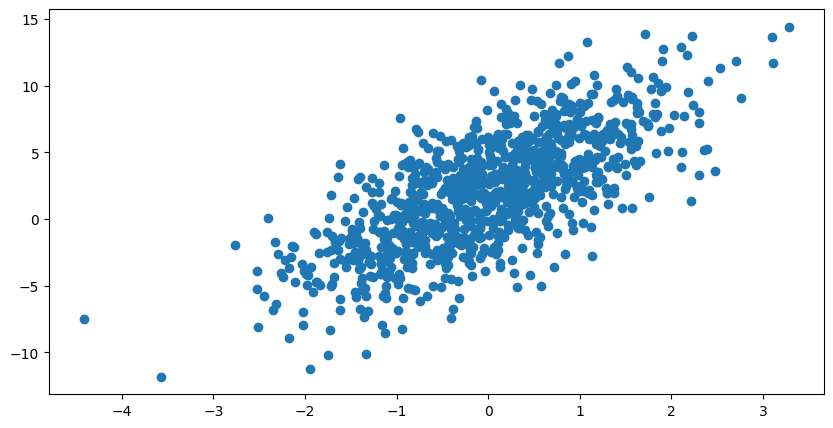

In [4]:
import matplotlib.pyplot as plt

# 设置图的尺寸
plt.figure(figsize=(10, 5))
plt.scatter(features[:, 0].numpy(), labels.numpy())
plt.show()

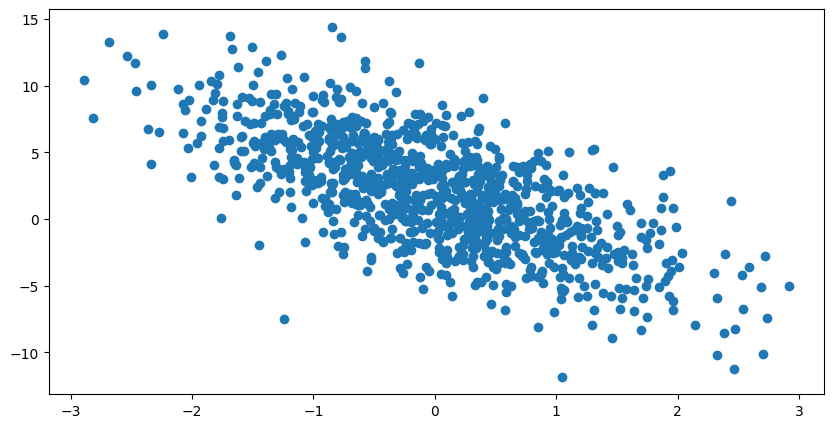

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(features[:, 1].numpy(), labels.numpy())
plt.show()

### 2.2.2 读取数据

在训练模型时，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回`batch_size`(批量大小)个随机样本的特征和标签。

In [6]:
import random
import numpy as np

def dataLoader(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本读取是随机的，因此打乱样本顺序
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield torch.index_select(features, 0, j), torch.index_select(labels, 0, j)

下面我们通过`dataLoader`读取一个小批量样本并打印，设置每个批量十个样本。

In [7]:
batch_size = 10

for data_x, data_y in dataLoader(batch_size, features, labels):
    print(data_x)
    print(data_y)
    break

tensor([[ 0.3147, -0.5980],
        [-1.6663, -0.4240],
        [ 0.9387,  1.0624],
        [-0.9615, -2.8134],
        [-0.7897, -2.3618],
        [ 1.5570, -1.4536],
        [ 0.4702, -1.8269],
        [-0.0999, -0.0559],
        [ 0.2150, -0.2365],
        [-0.1881,  0.5317]])
tensor([[ 4.7419],
        [-1.7350],
        [ 1.6510],
        [ 7.5598],
        [ 6.7242],
        [11.0419],
        [ 8.8841],
        [ 1.8640],
        [ 3.3445],
        [-0.1587]])


我们可以再次查看样本的形状。

In [8]:
data_x.shape

torch.Size([10, 2])

In [9]:
data_y.shape

torch.Size([10, 1])

### 2.2.3 初始化模型参数

我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化为0。

In [10]:
w = torch.normal(mean=0, std=0.01, size=(num_inputs, 1))
b = torch.zeros(size=(1,))

在模型训练时，需要对参数进行梯度求解，因此我们需要告诉机器，上面两个参数时需要求解梯度的。

In [11]:
w.requires_grad = True
b.requires_grad = True

### 2.2.4 定义模型

下面我们进行线性回归模型的实现。

模型计算的公式为：

$$
\pmb{\hat{y}} = \pmb{X\omega}+b
$$

In [12]:
def linearRegression(x, w, b):
    return torch.mm(x, w) + b

### 2.2.5 定义损失函数

我们使用最常用最基本的损失函数作为本例中的损失函数——平方损失函数。下面我们实现平方损失函数。

一般而言，平方损失函数为如下形式：

$$
\ell(\pmb{\omega},b)=\frac{(\hat{y}-y)^2}{2}
$$

但由于在本例中，我们使用的小批量训练，因此损失函数计算方法稍有变化，函数公式将如下所示：

$$
\ell(\pmb{\omega},b)=\frac{(\pmb{\hat{y}}-\pmb{y})^T(\pmb{\hat{y}}-\pmb{y})}{2}
$$

>1. 需要注意的是，实现时不要过分拘泥于具体的公式，公式只是模型的表达方式，简洁的阐明算法的执行规则。比如在小批量数据处理时，如果$(\pmb{\hat{y}}-\pmb{y})$的`shape=[1,100]`，那么上面的公式就需要稍微变化，变为下面的格式：
$$
\ell(\pmb{\omega},b)=\frac{(\pmb{\hat{y}}-\pmb{y})(\pmb{\hat{y}}-\pmb{y})^T}{2}
$$
>2. 在小批量计算时，你会发现，我们计算得到的是总损失，因此，如果你想得到平均的损失，那么损失函数还可以写成如下格式：
$$
\ell(\pmb{\omega},b)=\frac{(\pmb{\hat{y}}-\pmb{y})(\pmb{\hat{y}}-\pmb{y})^T}{2\times BatchSze}
$$
其中`BatchSize`表示每批数据的数目。

不论是何总形式，我们的所希望的就是让损失函数不断地变小，这是永恒不变的目标。因此在本例中，是否有`BatchSize`对优化地最终结果并不重要，当然，如果加上`BatchSize`，那么损失函数地值将会更小，明显上数据会更好看。

In [13]:
def squared_loss(y_hat, y):
    loss_y = (y_hat - y.reshape(y_hat.shape))
    return  torch.mm(loss_y.T, loss_y) / 2

### 2.2.6 定义优化算法

下面我们实现前面所讲的小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小从而得到平均值。

In [14]:
def SGD(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad.data / batch_size
    return params

### 2.2.7 训练模型

在训练中，我们将多次迭代模型，并通过梯度求导不断地调整模型参数，使得模型输出与真实输出之间的误差最小。下面我们开始训练模型，训练模型其实是一个很有序的过程，简单概括，我们可以概括成如下流程：

1. 将数据和参数输入到模型并保留结果；
2. 将结果和样本标签输入到损失函数求解损失；
3. 对损失进行梯度求解；
4. 对参数进行随机梯度下降。

每一次执行上面的步骤，参数就会被进一步优化，同时损失函数计算得到的损失就会进一步降低，当然，损失降到后期将会在一个最小值点进行波动，因此随着迭代次数的增加，损失在大趋势上是减少的。

下面我们开始模型的训练。

In [15]:
lr = 0.03
batch_size = 10
num_epochs = 3
lin_reg = linearRegression
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in dataLoader(batch_size, features, labels):
        y_hat = lin_reg(x, w, b)
        l = loss(y_hat, y)
        l.backward(torch.ones_like(l))
        with torch.no_grad():
            [w, b] = SGD([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    y_hat = lin_reg(features, w, b)
    train_l = loss(y_hat, labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().detach().numpy()))

epoch 1, loss 24.708807
epoch 2, loss 0.109579
epoch 3, loss 0.050427


训练完成，我们接下来查看训练的结果和真实数据集生成的结果。结果证明，训练的最终结果和实际生成数据的参数基本一致。

In [16]:
print(true_omega, true_b)

tensor([[ 3., -3.]]) 2


In [17]:
print(w, b)

tensor([[ 2.9997],
        [-2.9998]], requires_grad=True) tensor([1.9996], requires_grad=True)


## 2.3 线性回归的简洁实现

随着深度学习框架的不断发展，搭建深度学习算法变得越来越便利。在学习实践中，后来的学习者通常可以借助深度学习框架通过简洁的代码来实现同样的模型。接下来，我们将介绍如何使用`Pytorch`来简单实现线性回归算法。

### 2.3.1 数据集的生成

与上一小节操作类似，我们利用相同的方式生成数据集，其中`features`市训练数据特征，`labels`则是数据标签。

In [14]:
import torch

num_inputs = 2
num_examples = 1000
true_omega = torch.tensor([[2, -3.4]])
true_b = 4.2
features = torch.normal(mean=0.,std=1, size=(num_examples, num_inputs))
labels = torch.mm(features, true_omega.T) + true_b
labels += torch.normal(mean=0.,std=0.01, size=labels.shape)

下面我们通过绘图工具`matplotlib`绘制两个特征数据点随`labels`的分布。

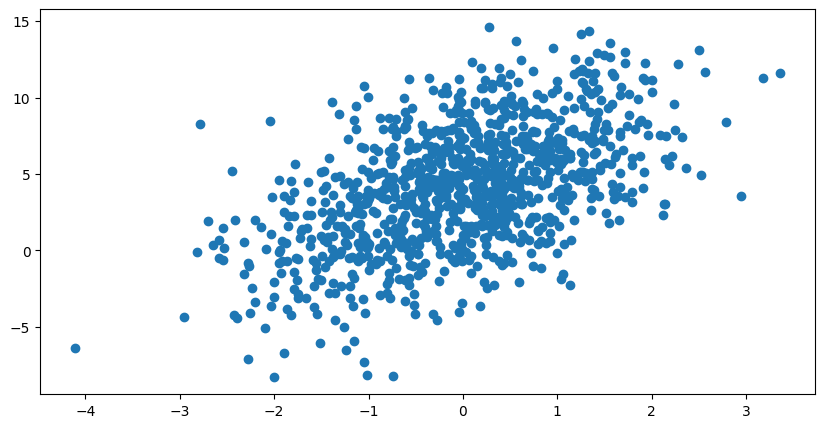

In [15]:
import matplotlib.pyplot as plt

# 设置图的尺寸
plt.figure(figsize=(10, 5))
plt.scatter(features[:, 0].numpy(), labels.numpy())
plt.show()

### 2.3.2 读取数据

在上一节中，我们通过编写`dataLoader`读取数据，在`Pytorch`中，也有已经封装好的数据读取函数，名称也一样，但是需要做一些不同的步骤。首先封装`features`和`labels`，接着在封装好的数据集中进行读取。

In [16]:
from torch.utils import data

batch_size = 10
# 将数据和标签进行组合
dataset = data.TensorDataset(features, labels)
# 随机的读取小批量数据
data_iter = data.DataLoader(dataset, batch_size, shuffle=True)

这个操作和上一小节类似，就是随机的读取小批量数据样本。下面我们展示其中一个批量的数据集样本。

In [17]:
for x, y in data_iter:
    print(x, y)
    break

tensor([[-0.2358, -0.2727],
        [ 0.1956,  0.3114],
        [ 1.3836,  0.8860],
        [ 0.0499,  0.8113],
        [-0.5324,  1.2172],
        [-0.1784, -0.2856],
        [-1.1996,  0.2181],
        [ 1.3405, -2.2044],
        [ 0.6018,  0.5982],
        [-0.5861, -1.0458]]) tensor([[ 4.6517],
        [ 3.5121],
        [ 3.9568],
        [ 1.5422],
        [-0.9977],
        [ 4.8219],
        [ 1.0633],
        [14.3803],
        [ 3.3566],
        [ 6.5958]])


### 2.3.3 定义模型

从上一节依据线性回归理论从零定义模型参数，并细致的描述了线性回归模型计算原理。但当模型结构变得更加复杂时，使用上面的形式去完成这些定义、训练步骤将变得更加繁琐。其实在目前流行的深度学习框架都提供了大量预定义的层，这种变化使得我们只需要关注使用哪些层来构造模型。下面将介绍如何使用`Pytorch`更简洁的定义线性回归。

首先，导入`nn`模块。实际上，`nn`是`neural network`(神经网络)的缩写。顾名思义，该模块定义了大量神经网络的层。我们先定义一个模型变量`net`，它是一个`Sequential`实例。在所有的框架中，`Sequential`实例可以看作一个串联各个层的容器。在构造模型时，我们在该容器中依次添加各种层。当给定输入数据时，容器中的每一层将依次计算并将输出作为下一层的输入。

In [1]:
from torch import nn

net = nn.Sequential()

在单层神经网络中，线性回归输出层中的神经元和输入层中的各个输入是完全连接的，如下图所示。因此，线性回归的输入层又叫全连接层。在`Pytorch`中，全连接层是一个`Linear`实例。在`Pytorch`中，我们需要明确定义该全连接输入个数和输出个数。

![img-2-3-1](./images/2-3-1.png)

In [6]:
net.add_module("lin1",nn.Linear(2, 1))

在其他的深度学习框架中，已经轻松到无需我们自己说明输入个数，而只需明确输出个数，框架会自动根据初始数据以及对应层输出个数来推断输入个数。但是在`Pytorch`中，则需要我们认为的输入每一层的输入和输出，这在一定程度上需要使用者对深度学习网络模型的理论更加了解。

### 2.3.4 初始化模型参数

在使用`net`前，我们需要初始化模型参数，如线性回归模型中的权重和偏置。下面我们对其进行初始化，将模型的权重初始化为随机采样于均值为`0`、标准差为`0.01`的正态分布，偏差参数设置为`0`。

In [7]:
for module in net.modules():
    if isinstance(module, nn.Linear):
        module.weight.data.normal_(mean=0, std=0.01)
        module.bias.data.fill_(0.0)

### 2.3.5 定义损失函数

在`Pytorch`中，损失函数同样被定义在`nn`模块中，下面将其提供的平方损失作为此模型的损失函数。

In [22]:
criterion = nn.MSELoss()

### 2.3.6 定义优化算法

同样的，我们也无需实现小批量随机梯度下降。在`Pytorch`中，有专门的一个`optim`优化器库，其中给我们提供了大量的优化器。下面我们创建一个随机梯度下降的优化器，同时指定学习率为`0.03`。该优化算法将用迭代`net`实例所有通过`add_module`函数嵌套的层所包含的全部参数。这些参数可以通过`parameters`函数来获取。

In [13]:
from torch import optim

optimizer = optim.SGD(net.parameters(), lr=0.03)

### 2.3.7 模型训练

下面我们使用上面定义好的模型、损失函数以及优化器进行一次完整的训练。

In [26]:
num_epoches = 3
for epoch in  range(1, num_epoches + 1):
    for inputs, label in data_iter:
#         inputs, label = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
    l = criterion(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().detach().numpy()))

epoch 1, loss: 0.000096
epoch 2, loss: 0.000095
epoch 3, loss: 0.000095


下面我们分别比较训练模型的最终参数以及真实模型的参数。我们通过访问`net`中所需特定的层来获取其权重(`weight`)以及偏置(`bias`)。从下面的结果可以看出，训练的结果的最终参数与真实参数十分接近。

In [31]:
params = net.state_dict()
print('true_weight: ' + str(true_omega))
print('net_weight: ' + str(params['lin1.weight']))

true_omega: tensor([[ 2.0000, -3.4000]])
net_omega: tensor([[ 2.0002, -3.4005]])


In [32]:
print('true_bias: ' + str(true_b))
print('net_bias: ' + str(params['lin1.bias']))

true_bias: 4.2
net_bias: tensor([4.2001])


#### 小结

- 使用`Pytorch`可以快速的搭建模型并进行训练。
- 在`Pytorch`中，`nn`中定义了大量的神经网络层以及损失函数以供使用，而在`optim`中则提供了主流的优化器。

## 2.4 `softmax`回归

前几节介绍的线性回归模型适用于输出为连续值得情景。在另一类情景中，模型输出可以是一个像图像类别这样的离散值。对于这样的离散值预测问题，我们可以使用诸如`softmax`回归在内的分类模型。和线性回归不同，`softmax`回归的输出单元从一个变成了多个，且引入的`softmax`运算使输出更合适离散值的预测和训练。本节以`softmax`回归模型为例，介绍神经网络中的分类模型。

### 2.4.1 分类问题

接下来我们可以考虑一个简单的图像分类问题，其输入图像的高和宽均为`2`像素，且色彩为灰度。这样每个像素值都可以用一个标量表示。我们将图像中的`4`像素分别记为$x_1,x_2,x_3,x_4$。假设训练数据集中图像的真实标签为狗、猫或鸡(假设可以用`4`像素表示出这3种动物)，这些标签分别对应离散值$y_1,y_2,y_3$。

我们通常使用离散的数值来表示类别，例如$y_1=1,y_2=2,y_3=3$。如此，一张图像的标签为`1`、`2`和`3`这三个数值中的一个。虽然我们仍然可以使用回归模型来进行建模，并将预测值就近定点化到`1`、`2`和`3`这三个离散值之一，但这种连续值到离散值的转化通常会影响到分类质量。因此我们一般使用更加合适的离散值输出模型来解决分类问题。

### 2.4.2 `softmax`回归模型

`softmax`回归跟线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，**`softmax`回归的输出值个数等于标签里的类别数**。因为一共有`4`中特征和`3`种输出动物类别，所以权重包含`12`个标量(下面公式中带下标的$\omega$)、偏差包含`3`个标量(带下标的$b$)，且对每个输入计算$o_1,o_2,o_3$这三个输出，公式如下所示：

$$
\begin{cases}
o_1=x_1\omega_{11}+x_2\omega_{21}+x_3\omega_{31}+x_4\omega_{41}+b_1,\\
o_2=x_1\omega_{12}+x_2\omega_{22}+x_3\omega_{32}+x_4\omega_{42}+b_2,\\
o_3=x_1\omega_{13}+x_2\omega_{23}+x_3\omega_{33}+x_4\omega_{43}+b_3,\\
\end{cases}
$$

下图用神经网络图描绘了上面的计算，当然，省略了权重和偏置的计算，只保留输入到输出的关系。`softmax`回归与线性回归⼀样，也是⼀个单层神经⽹络。由于每个输出$o_1,o_2,o_3$的计算都要依赖于所有的输⼊$x_1, x_2, x_3, x_4$，`softmax`回归的输出层也是⼀个全连接层。

![img2-4-1](./images/2-4-1.png)

当然，为了便于理解，我们也可以将神经网络图绘制成下面的模式。

![img2-4-2](./images/2-4-2.png)

但是从上面可以看出，随着网络层的复杂度的变化，神经网络图将会变得越来越繁杂，因此在标准的神经网络图表示中，都会隐去权重和偏置。

##### `softmax`运算

既然分类问题需要得到离散的预测输出，一个简单的办法是将输出值$o_i$作为预测类别是$i$的置信度，并将值最大的输出对应的类别作为预测输出，即输出$\underset{i}{argmax}\;o_i$。

例如，如果$o_1,o_2,o_3$分别为`0.1,10,0.1`，由于$o_2$最大，因此此时的网络模型会将该图片预测为类别`2`，在本例中其代表猫。

然而，直接使用输出层的输出存在两个问题。一方面，由于输出层的输出值范围不确定，我们很难直接的判断这些值的含义。例如在上面例子中的输出值`10`表示“很置信”图像类别为猫，因为该输出是其他两类的输出值的`100`倍。但如果$o_1=o_3=10^3$，那么输出值为`10`却又表示图像类别为猫的概率很低。另一方面，由于真实标签是离散值，这些离散值与不确定范围的输出之间的误差难以衡量。

`softmax`运算符解决了上面两个问题。它通过下面的规则将输出值变换成值为正且和为1的概率分布。

$$
\hat{y_1},\hat{y_2},\hat{y_3}=softmax(o_1,o_2,o_3)
$$

其中：

$$
\begin{cases}
\hat{y_1}=\frac{e^{o_1}}{\sum_{i=1}^3 e^{o_i}},\\
\hat{y_2}=\frac{e^{o_2}}{\sum_{i=1}^3 e^{o_i}},\\
\hat{y_3}=\frac{e^{o_3}}{\sum_{i=1}^3 e^{o_i}},\\
\end{cases}
$$

从上面可以看出，$\hat{y_1}+\hat{y_2}+\hat{y_3}=1$且$0\leq \hat{y_1},\hat{y_2},\hat{y_3}\leq 1$，因此$\hat{y_1},\hat{y_2},\hat{y_3}$是一个合法的概率分布。此时如果$\hat{y_2}=0.8$，不管$\hat{y_1}$和$\hat{y_3}$的值是多少，我们都知道图像类别为猫的概率是`80%`。此外，我们注意到：

$$
\underset{i}{argmax}\; o_i=\underset{i}{argmax}\;\hat{y_i}
$$

因此`softmax`运算不改变预测类别的输出结果。

### 2.4.3 单样本分类的矢量计算表达

为了提高计算效率，我们可以将单样本分类通过矢量计算来表达。在上面的图像分类问题中，假设`softmax`回归的权重和偏差分别如下所示：

$$
\pmb{W}=\begin{bmatrix}
\omega_{11} & \omega_{12} & \omega_{13}\\
\omega_{21} & \omega_{22} & \omega_{23}\\
\omega_{31} & \omega_{32} & \omega_{33}\\
\omega_{41} & \omega_{42} & \omega_{43}\\
\end{bmatrix}
,
\pmb{b}=[\begin{matrix}
b_1& b_2& b_3
\end{matrix}]
$$

在计算时，我们需要将图像样本展平，变成一维向量。在本例中，宽和高分别为`2`个像素的图像样本$i$的特征将表征为：

$$
\pmb{x}^i=[\begin{matrix}
x_1^i& x_2^i& x_3^i & x_4^i
\end{matrix}]
$$

输出层的输出结果为：

$$
\pmb{o}^i=[\begin{matrix}
o_1^i& o_2^i& o_3^i
\end{matrix}]
$$

最后经过`softmax`处理，预测为狗、猫或鸡的概率分布为:

$$
\pmb{y}^i=[\begin{matrix}
y_1^i& y_2^i& y_3^i
\end{matrix}]
$$

其中，`softmax`回归对象本$i$分类的矢量计算表达式为：

$$
\pmb{o}^i=\pmb{x}^i\pmb{W}+\pmb{b},\\
\pmb{\hat{y}}^i=softmax(\pmb{o}^i)
$$


### 2.4.4 小批量样本分类的矢量计算表达式

在前面的基础知识中，我们提到，使用矩阵计算时要比普通计算效率更高。因此，为了进一步提升计算效率，我们通常会对小批量数据做矢量计算。广义上讲，给定一个小批量样本，其批量大小为`n`，输入个数(特征数)为`d`，输入个数(类别数)为`q`。设批量特征为$\pmb{X}\in \mathcal{R}^{n\times d}$。假设`softmax`回归中的权重和偏差参数分别为$\pmb{W}\in \mathcal{R}^{d\times q}$和$\pmb{b}\in \mathcal{R}^{1\times q}$。`softmax`回归的矢量计算表达式为：

$$
\pmb{O}=\pmb{XW}+\pmb{b},\\
\pmb{\hat{Y}}=softmax(\pmb{O})
$$

上面的加法操作中运用了广播机制，$\pmb{O,\hat{Y}}\in \mathcal{R}^{n\times q}$且这两个矩阵的第$i$行分别为样本$i$的输出$\pmb{o}^i$和概率分布$\pmb{\hat{y}}^i$。

### 2.4.5 交叉熵损失函数

前⾯提到，使⽤`softmax`运算后可以更⽅便地与离散标签计算误差。我们已经知道,`softmax`运算将输出变换成⼀个合法的类别预测分布。实际上，真实标签也可以⽤类别分布表达：对于样本$i$，我们构造向量$\pmb{y}^i\in \mathcal{R}^q$，使其第$y^i$(样本$i$类别的离散数值)个元素为1，其余为`0`。这样我们的训练目标可以设为使预测概率分布$\pmb{\hat{y}}^i$尽可能接近真实的标签概率分布$\pmb{y}^i$。

我们可以像线性回归那样使用平方损失函数$\frac{||\pmb{\hat{y}}^i-\pmb{y}^i||^2}{2}$。然而，想要预测结果正确，我们其实并不需要预测概率完全等于标签概率。例如，在图像分类的例子里，如果$y^i=3$，那么我们只需要$\hat{y}^i_3$比其他两个预测值$\hat{y}^i_1$和$\hat{y}^i_2$大就行。即使$\hat{y}^i_3=0.6$，不管其他两个预测值为多少，类别预测均正确。而平方损失则过于严格，例如$\hat{y}^i_3$
